# 카메라 스티커앱 만들기 첫걸음

## Step 1. 스티커 구하기 or 만들기

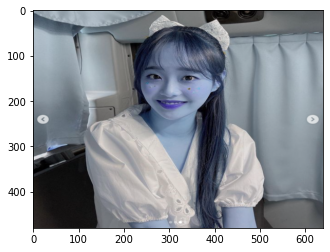

In [1]:
# 필요한 모듈 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

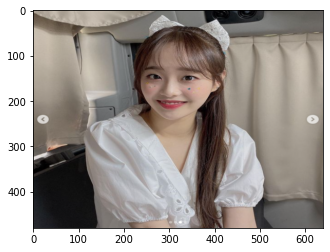

In [2]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(239, 110) (368, 239)]]


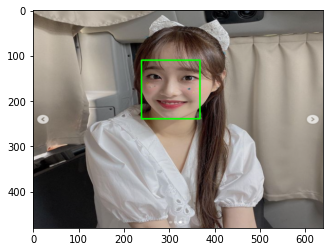

In [5]:
print(dlib_rects)   # 찾은 얼굴 영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


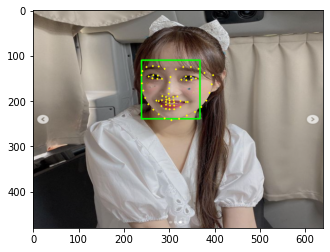

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ('코끝의 위치: ', landmark[33]) # nose edge index : 33
    x = landmark[33][0] # 수염의 중앙 x좌표값
    y = landmark[33][1] # 수염의 중앙 y좌표값
    w = dlib_rect.width() # 수염 스티커 resize를 위한 경계박스 너비
    h = dlib_rect.width() # 수염 스티커 resize를 위한 경계박스 높이
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

코끝의 위치:  (300, 194)
(x,y) : (300,194)
(w,h) : (130,130)


In [10]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


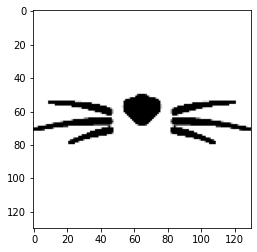

In [11]:
plt.imshow(img_sticker)

In [12]:
left_top_x = x - img_sticker.shape[0] // 2
right_bottom_x = x + img_sticker.shape[0] // 2
left_top_y = y - img_sticker.shape[1] // 2
right_bottom_y = y + img_sticker.shape[1] // 2

print('(left_top_x, left_top_y): ', (left_top_x, left_top_y)) # 수염 이미지 좌측 상단의 x,y 좌표값
print('(right_bottom_x, right_bottom_y): ', (right_bottom_x, right_bottom_y)) # 수염 이미지 우측 하단의 x,y 좌표값

(left_top_x, left_top_y):  (235, 129)
(right_bottom_x, right_bottom_y):  (365, 259)


## Step 4. 스티커 적용하기

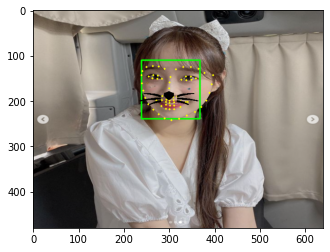

In [13]:
sticker_area = img_show[left_top_y:right_bottom_y, left_top_x:right_bottom_x]
img_show[left_top_y:right_bottom_y, left_top_x:right_bottom_x] = np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기

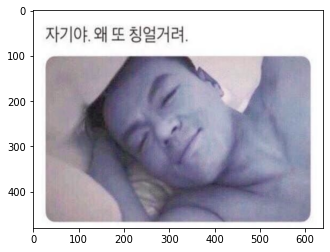

In [15]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/jyp.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

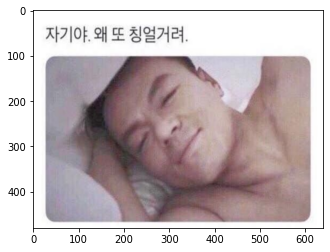

In [16]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(239, 110) (368, 239)]]


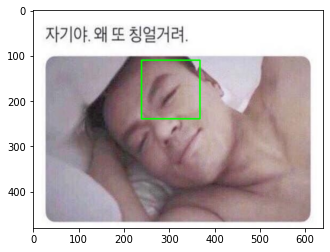

In [17]:
print(dlib_rects)   # 찾은 얼굴 영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 누운 사진의 경우 얼굴인식부터 제대로 되지 않음
- 이 부분 개선해야되나 아직 진행 중